# Using Cross Validation on a Regression Model.

In [161]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt

### In this Project:
#### A regression model will be analyzed with cross validation to ensure it is accurate.

## Creating the Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

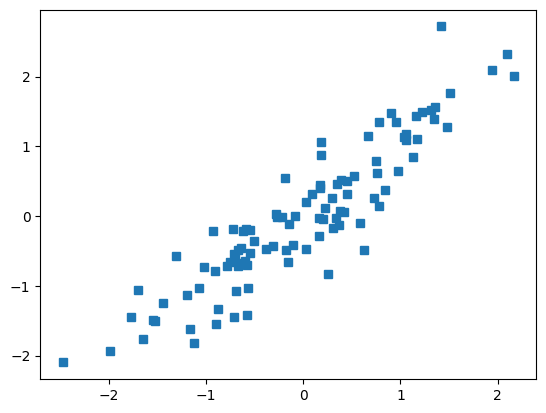

In [162]:
# creating data
N = 100

# set of random x and y values
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2 # neater y dataset

#y = x + torch.randn(N,1)/torch.randn(1) # scattered y dataset
#y = 2*x # linear y dataset

# plot
plt.plot (x,y, 's')
plt.show

### Creating the ANN regression model

In [163]:
ANN_reg = nn.Sequential(
    nn.Linear(1,1), # input
    nn.ReLU(), # activation
    nn.Linear(1,1) # output
)

learning_rate = 0.05
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate)

# Partitioning Dataset
- Random numbers between (0,N) are selected because the dataset has not been created.

In [164]:
# selecting random data points between 0 and N
ratio_training_set = 0.8
train_index = np.random.choice(range(N), int(ratio_training_set*N), replace=False)

# creating bools for training and testing data
include_in_training_bool = np.zeros(N, dtype=bool) # initialized to false for all values
include_in_training_bool[train_index] = True # set to true for data included in training set

print(x[include_in_training_bool].shape)
print(x[~include_in_training_bool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


## Training the Model

In [165]:
# training model parameters
epochs = 500
losses = torch.zeros(epochs) # initializing with empty vector

for epoch_IDX in range(epochs):
    y_hat = ANN_reg(x[include_in_training_bool])# only input data from training dataset

    # calculating loss
    loss = loss_func(y_hat, y[include_in_training_bool])
    losses[epoch_IDX] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [166]:
# calculating loss for test set
test_y_hat = ANN_reg(x[~include_in_training_bool]) # complement of training set, which is the test set

#test_loss = (test_y_hat - y[~include_in_training_bool]).pow(2).mean() # "manual" calculation for MSE loss
test_loss = loss_func(test_y_hat, y[~include_in_training_bool]) # MSE loss for test set

# printing out loss for each set
print(f"Final Training Loss: {loss.detach():.2f}")
print(f"Final Test Loss: {test_loss.detach():.2f}")

Final Training Loss: 0.18
Final Test Loss: 0.16


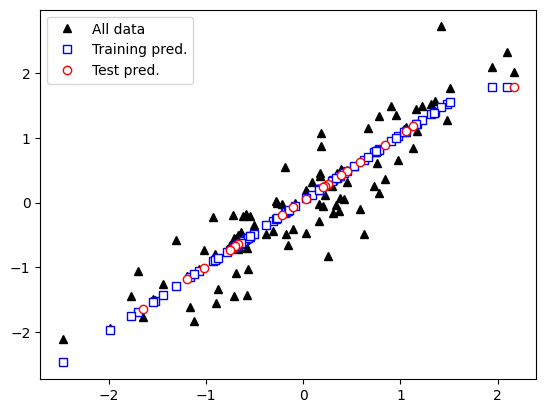

In [167]:
# plotting results
final_predictions_training = ANN_reg(x[include_in_training_bool]).detach().numpy()

# plotting predictions and actual values
plt.plot(x,y,'k^',label='All data')
plt.plot(x[include_in_training_bool], final_predictions_training,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~include_in_training_bool],test_y_hat.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()